In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import tensorflow  as tf
from tensorflow import keras

In [ ]:
sample = 1000
data_x_values = np.random.uniform(0,2*math.pi,1000).astype(np.float32)
data_y_values = np.sin(data_x_values).astype(np.float32)

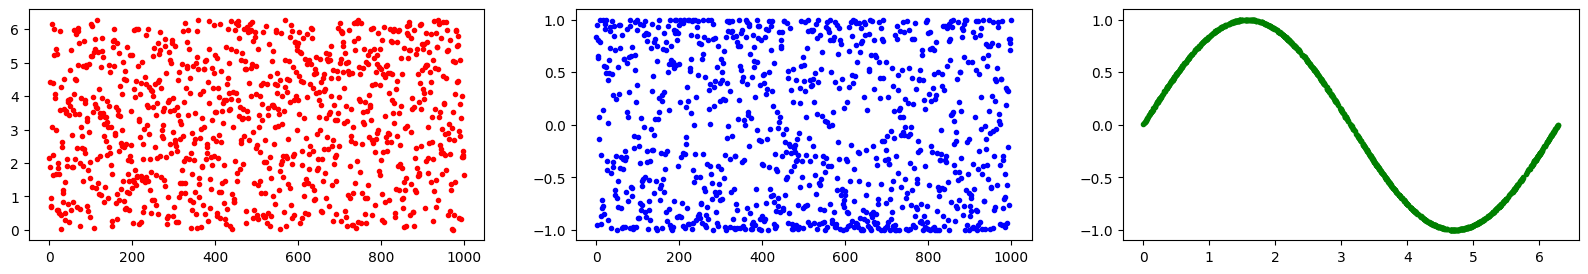

In [ ]:
plotter = plt.figure(figsize=(20,3))
plot_x = plotter.add_subplot(131)
plot_y = plotter.add_subplot(132)
plot_xy = plotter.add_subplot(133)
plot_x.plot(data_x_values,'r.')
plot_y.plot(data_y_values , 'b.')
plot_xy.plot(data_x_values , data_y_values , 'g.')

##Data Splitting And Noise Addition


##Noise Addition

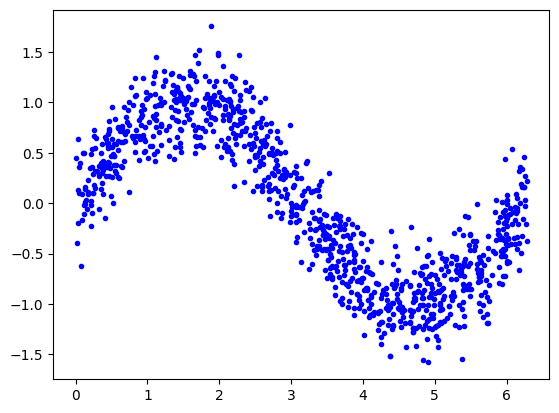

In [ ]:
data_y_values = data_y_values + 0.25*np.random.randn(*data_y_values.shape)

plt.plot(data_x_values , data_y_values , 'b.')

##Splitting Data

In [ ]:
training_data_split = int(0.6*sample)
test_val_data_split = int(0.2*sample +training_data_split)
##print(training_data_split , test_val_data_split)
x_train,x_test , x_validate = np.split(data_x_values , [training_data_split , test_val_data_split])
y_train,y_test , y_validate = np.split(data_y_values , [training_data_split , test_val_data_split])


print(x_train.shape , x_test.shape , x_validate.shape)

(600,) (200,) (200,)


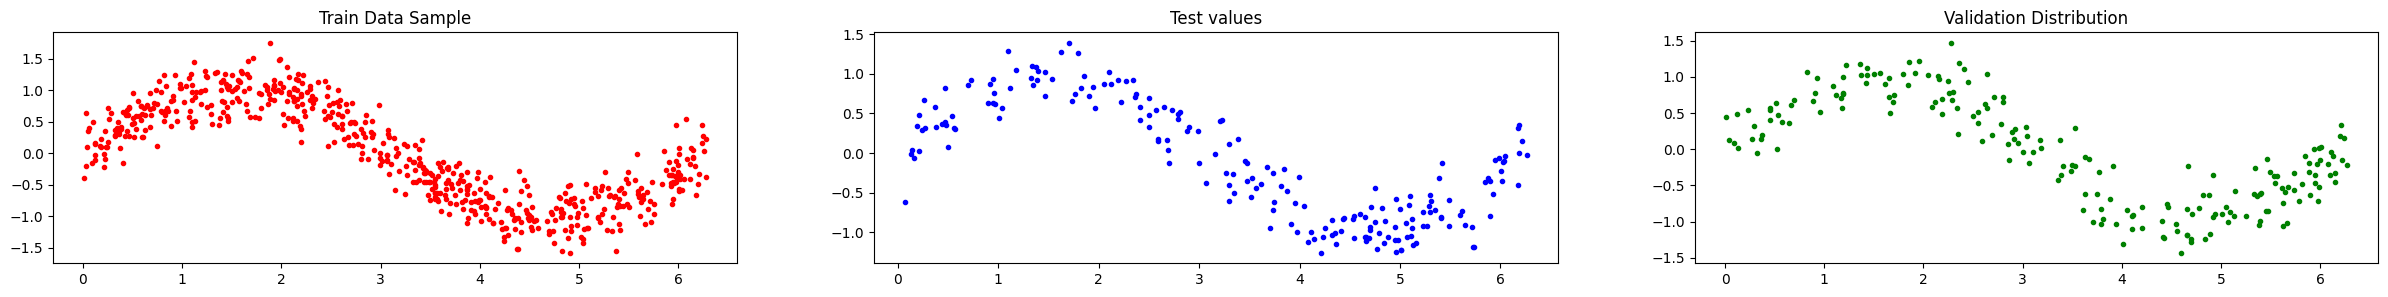

In [ ]:
plotter_splitter = plt.figure(figsize=(30,3))
plot_x = plotter_splitter.add_subplot(131)
plot_y = plotter_splitter.add_subplot(132)
plot_xy = plotter_splitter.add_subplot(133)
plot_x.plot(x_train , y_train,'r.')
plot_y.plot(x_test,y_test , 'b.')
plot_xy.plot(x_validate , y_validate , 'g.')
plot_x.set_title("Train Data Sample");#plot_x.set_ylabel('0-2(pi)');plot_x.set_xlabel("Number Of Sample")
plot_y.set_title("Test values");#plot_y.set_ylabel('0-2*Pi');plot_y.set_xlabel("Number Of Sample")
plot_xy.set_title("Validation Distribution");#plot_xy.set_ylabel('0-2*pi');plot_xy.set_xlabel("Number Of Sample")


##Model Creation and Training

In [ ]:
sine_model = tf.keras.Sequential()
sine_model.add(keras.layers.Dense(8,'relu' , input_shape=(1,)))
sine_model.add(keras.layers.Dense(1))

sine_model.compile(optimizer='adam' , loss='mse' ,metrics=['mae'] )
sine_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 16        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 25 (100.00 Byte)
Trainable params: 25 (100.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
sine_model_1_history = sine_model.fit(x_train , y_train , 32,500 ,validation_data=(x_validate , y_validate) )

Epoch 1/500
19/19 [==============================] - 1s 14ms/step - loss: 2.5087 - mae: 1.4642 - val_loss: 2.2348 - val_mae: 1.3713
Epoch 2/500
19/19 [==============================] - 0s 5ms/step - loss: 1.5401 - mae: 1.1219 - val_loss: 1.3294 - val_mae: 1.0243
Epoch 3/500
19/19 [==============================] - 0s 5ms/step - loss: 0.9488 - mae: 0.8327 - val_loss: 0.7834 - val_mae: 0.7515
Epoch 4/500
19/19 [==============================] - 0s 5ms/step - loss: 0.6129 - mae: 0.6389 - val_loss: 0.5213 - val_mae: 0.6010
Epoch 5/500
19/19 [==============================] - 0s 4ms/step - loss: 0.4654 - mae: 0.5543 - val_loss: 0.4051 - val_mae: 0.5356
Epoch 6/500
19/19 [==============================] - 0s 5ms/step - loss: 0.4069 - mae: 0.5210 - val_loss: 0.3603 - val_mae: 0.5032
Epoch 7/500
19/19 [==============================] - 0s 4ms/step - loss: 0.3876 - mae: 0.5153 - val_loss: 0.3432 - val_mae: 0.4906
Epoch 8/500
19/19 [==============================] - 0s 4ms/step - loss: 0.3795 - 

In [ ]:
predictions = sine_model.predict(x_test)


Text(0, 0.5, ' Sine Function')

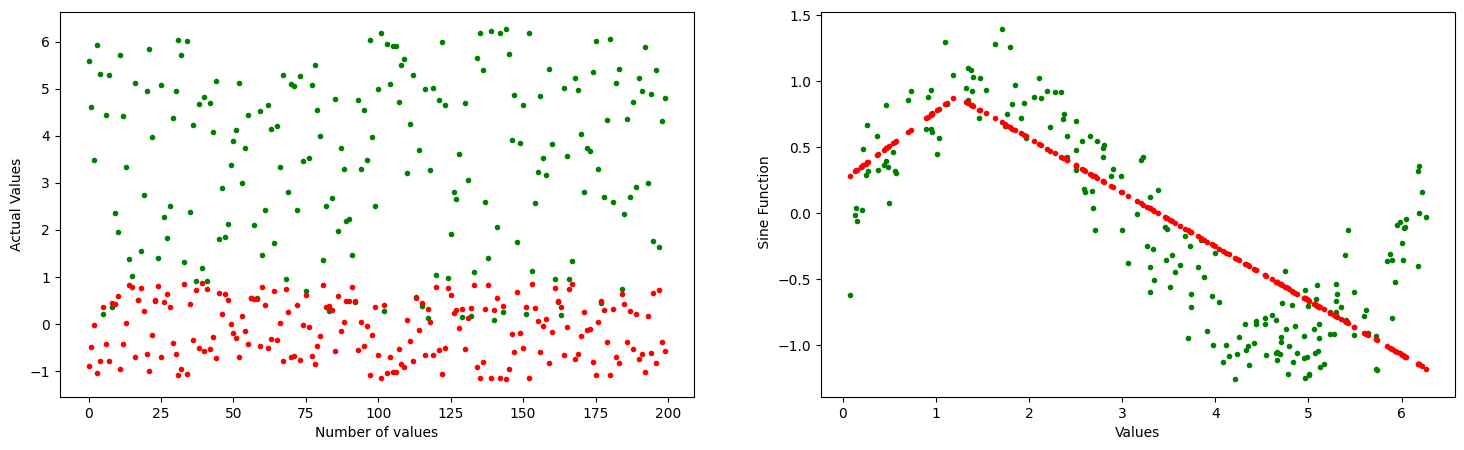

In [ ]:
predictions_plotter = plt.figure(figsize = (18,5))
variable_values = predictions_plotter.add_subplot(121)
predictions_results = predictions_plotter.add_subplot(122)

variable_values.plot(x_test , 'g.')
variable_values.plot(predictions ,  "r.")

variable_values.set_xlabel("Number of values")
variable_values.set_ylabel("Actual Values")

predictions_results.plot(x_test ,y_test, 'g.')
predictions_results.plot(x_test , predictions ,  "r.")

predictions_results.set_xlabel("Values")
predictions_results.set_ylabel(" Sine Function")

### Model Lost Understanding


In [ ]:
print(sine_model_1_history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


Text(0.5, 1.0, 'Mean Absolute Error')

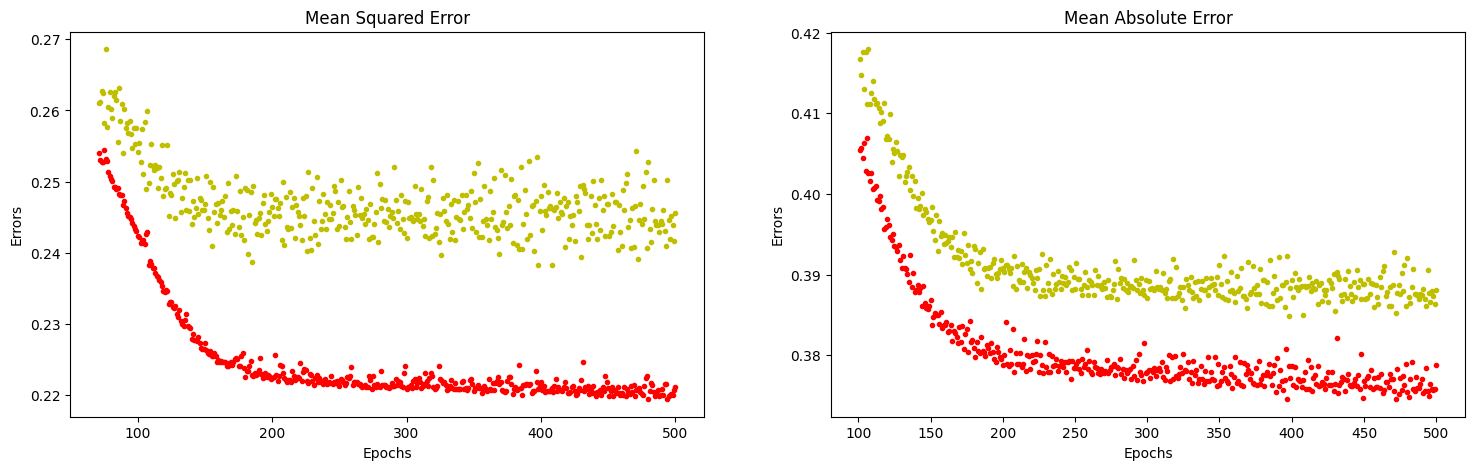

In [ ]:
training_loss_mse = sine_model_1_history.history['loss']
validation_loss_mse = sine_model_1_history.history['val_loss']
training_loss_mae = sine_model_1_history.history['mae']
validation_loss_mae = sine_model_1_history.history['val_mae']

number_of_epochs = range(1,len(training_loss_mse)+1)

loss_plotter = plt.figure(figsize = (18,5))
mse_plot = loss_plotter.add_subplot(121)
mae_plot = loss_plotter.add_subplot(122)

mse_plot.plot(number_of_epochs[70:] , training_loss_mse[70:] , 'r.')
mse_plot.plot(number_of_epochs[70:] , validation_loss_mse [70:], 'y.')
mse_plot.set_xlabel("Epochs")
mse_plot.set_ylabel("Errors")
mse_plot.set_title('Mean Squared Error')

mae_plot.plot(number_of_epochs[100:] , training_loss_mae[100:] , 'r.')
mae_plot.plot(number_of_epochs[100:] , validation_loss_mae [100:], 'y.')
mae_plot.set_xlabel("Epochs")
mae_plot.set_ylabel("Errors")
mae_plot.set_title('Mean Absolute Error')

###New Improved model

In [ ]:
sine_model_improved = tf.keras.Sequential()
sine_model_improved.add(keras.layers.Dense(16,'relu' , input_shape=(1,)))
sine_model_improved.add(keras.layers.Dense(16,'relu' , input_shape=(1,)))

sine_model_improved.add(keras.layers.Dense(1))

sine_model_improved.compile(optimizer='adam' , loss='mse' ,metrics=['mae'] )
sine_model_improved.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                32        
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
sine_model_2_history = sine_model_improved.fit(x_train , y_train , 64,500 ,validation_data=(x_validate , y_validate) )

Epoch 1/500
10/10 [==============================] - 1s 24ms/step - loss: 0.5221 - mae: 0.5918 - val_loss: 0.4217 - val_mae: 0.5416
Epoch 2/500
10/10 [==============================] - 0s 7ms/step - loss: 0.4819 - mae: 0.5876 - val_loss: 0.4047 - val_mae: 0.5318
Epoch 3/500
10/10 [==============================] - 0s 8ms/step - loss: 0.4553 - mae: 0.5694 - val_loss: 0.3857 - val_mae: 0.5176
Epoch 4/500
10/10 [==============================] - 0s 7ms/step - loss: 0.4313 - mae: 0.5465 - val_loss: 0.3693 - val_mae: 0.5068
Epoch 5/500
10/10 [==============================] - 0s 7ms/step - loss: 0.4104 - mae: 0.5361 - val_loss: 0.3510 - val_mae: 0.4950
Epoch 6/500
10/10 [==============================] - 0s 9ms/step - loss: 0.3901 - mae: 0.5212 - val_loss: 0.3383 - val_mae: 0.4869
Epoch 7/500
10/10 [==============================] - 0s 8ms/step - loss: 0.3712 - mae: 0.5077 - val_loss: 0.3223 - val_mae: 0.4758
Epoch 8/500
10/10 [==============================] - 0s 8ms/step - loss: 0.3533 - 

### Model Comparisons

7/7 [==============================] - 0s 4ms/step


Text(0, 0.5, ' Sine Function')

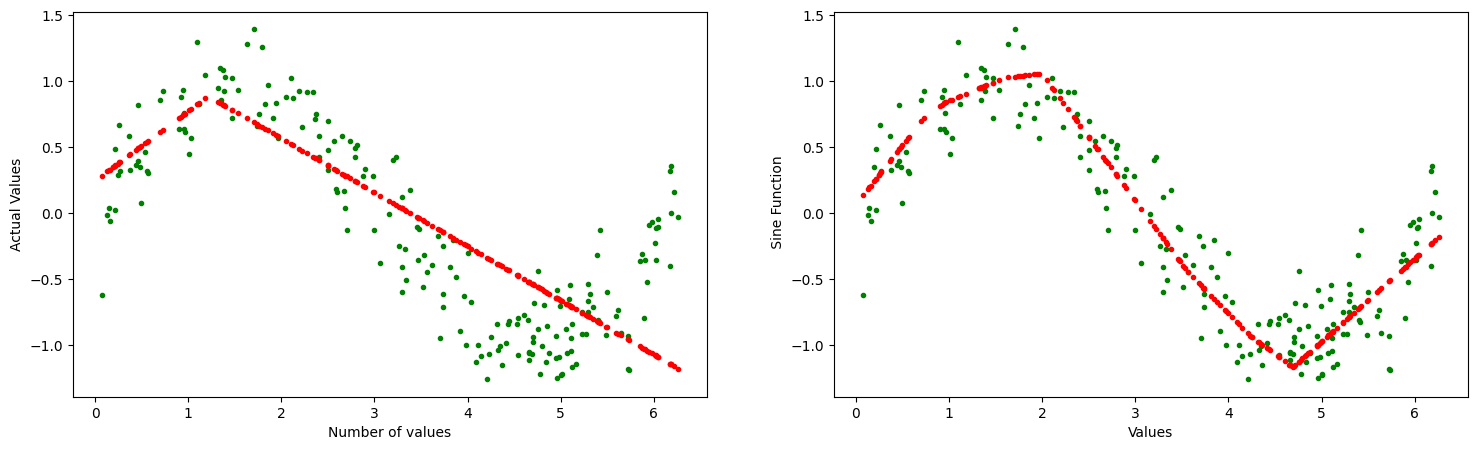

In [ ]:
predictions_improved = sine_model_improved.predict(x_test)
predictions_plotter = plt.figure(figsize = (18,5))
predictions_results_1 = predictions_plotter.add_subplot(121)
predictions_results_2 = predictions_plotter.add_subplot(122)

predictions_results_1.plot(x_test,y_test , 'g.')
predictions_results_1.plot(x_test , predictions_improved ,  "r.")

predictions_results_1.set_xlabel("Number of values")
predictions_results_1.set_ylabel("Actual Values")

predictions_results_2.plot(x_test ,y_test, 'g.')
predictions_results_2.plot(x_test , predictions_improved ,  "r.")

predictions_results_2.set_xlabel("Values")
predictions_results_2.set_ylabel(" Sine Function")

Text(0.5, 1.0, 'Model 1 mse')

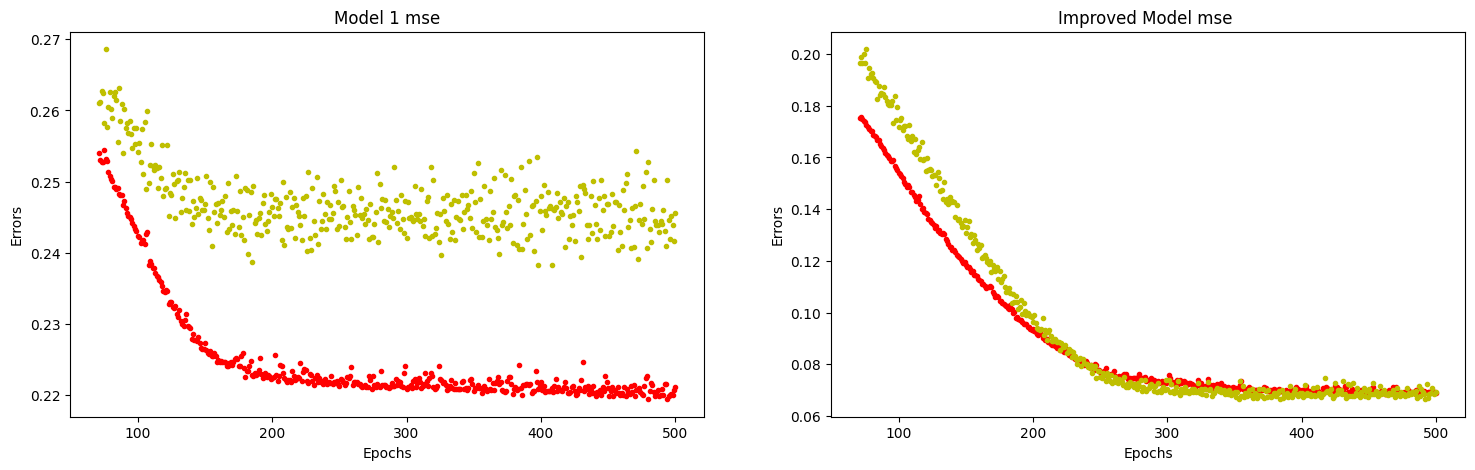

In [ ]:
training_loss_mse_1 = sine_model_2_history.history['loss']
validation_loss_mse_1 = sine_model_2_history.history['val_loss']
training_loss_mae_1 = sine_model_2_history.history['mae']
validation_loss_mae_1 = sine_model_2_history.history['val_mae']


loss_plotter = plt.figure(figsize = (18,5))
mse_plot = loss_plotter.add_subplot(121)
mse_plot_1 = loss_plotter.add_subplot(122)

mse_plot_1.plot(number_of_epochs[70:] , training_loss_mse_1[70:] , 'r.')
mse_plot_1.plot(number_of_epochs[70:] , validation_loss_mse_1 [70:], 'y.')
mse_plot_1.set_xlabel("Epochs")
mse_plot_1.set_ylabel("Errors")
mse_plot_1.set_title('Improved Model mse ')

mse_plot.plot(number_of_epochs[70:] , training_loss_mse[70:] , 'r.')
mse_plot.plot(number_of_epochs[70:] , validation_loss_mse [70:], 'y.')
mse_plot.set_xlabel("Epochs")
mse_plot.set_ylabel("Errors")
mse_plot.set_title('Model 1 mse')

Text(0.5, 1.0, 'Model 1 mae')

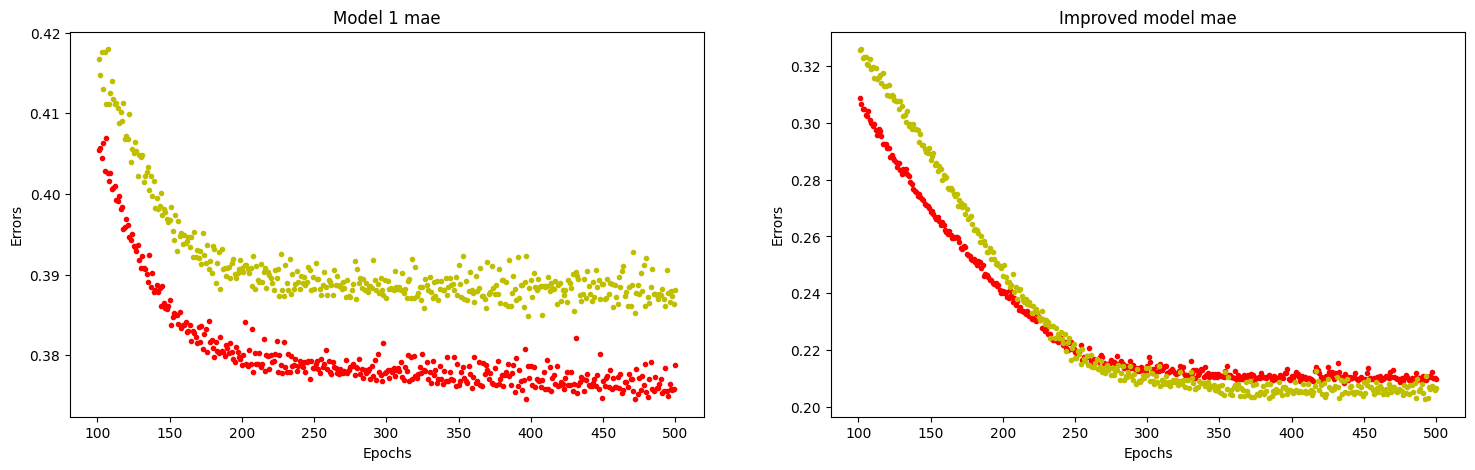

In [ ]:
loss_plotter = plt.figure(figsize = (18,5))
mae_plot = loss_plotter.add_subplot(121)
mae_plot_1 = loss_plotter.add_subplot(122)

mae_plot_1.plot(number_of_epochs[100:] , training_loss_mae_1[100:] , 'r.')
mae_plot_1.plot(number_of_epochs[100:] , validation_loss_mae_1 [100:], 'y.')
mae_plot_1.set_xlabel("Epochs")
mae_plot_1.set_ylabel("Errors")
mae_plot_1.set_title('Improved model mae')

mae_plot.plot(number_of_epochs[100:] , training_loss_mae[100:] , 'r.')
mae_plot.plot(number_of_epochs[100:] , validation_loss_mae [100:], 'y.')
mae_plot.set_xlabel("Epochs")
mae_plot.set_ylabel("Errors")
mae_plot.set_title('Model 1 mae')

#Saving the model and performing Predictions


In [ ]:
model_path = '/content/'
keras.models.save_model(sine_model_improved,model_path)

In [ ]:
loaded_model = keras.models.load_model(model_path)

7/7 [==============================] - 0s 2ms/step


Text(0, 0.5, 'Actual Values')

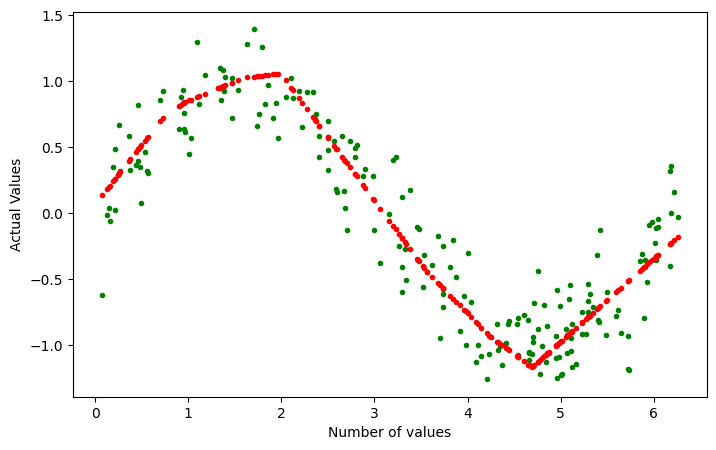

In [ ]:
predictions_loaded = loaded_model.predict(x_test)
predictions_plotter = plt.figure(figsize = (18,5))
predictions_results_1 = predictions_plotter.add_subplot(121)
# predictions_results_2 = predictions_plotter.add_subplot(122)

predictions_results_1.plot(x_test,y_test , 'g.')
predictions_results_1.plot(x_test , predictions_loaded ,  "r.")

predictions_results_1.set_xlabel("Number of values")
predictions_results_1.set_ylabel("Actual Values")

# predictions_results_2.plot(x_test ,y_test, 'g.')
# predictions_results_2.plot(x_test , predictions_loaded ,  "r.")

# predictions_results_2.set_xlabel("Values")
# predictions_results_2.set_ylabel(" Sine Function")